In [124]:
import pandas as pd
import numpy as np

# Part 2

In [125]:
pd.set_option('display.max_columns',None)
movies = pd.read_csv(r"C:\Users\pc\Downloads\Movie-Recommendation-System-main\movie_dataset.csv")
movies.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [126]:
print("title : ",movies['title'].loc[1])
print("overview : ",movies['overview'].loc[1])
print('\n')
print("cast : ",movies['cast'].loc[1])
print("director : ",movies['director'].loc[1])
print("genres : ",movies['genres'].loc[1])
print("keywords : ",movies['keywords'].loc[1])

title :  Pirates of the Caribbean: At World's End
overview :  Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.


cast :  Johnny Depp Orlando Bloom Keira Knightley Stellan Skarsg\u00e5rd Chow Yun-fat
director :  Gore Verbinski
genres :  Adventure Fantasy Action
keywords :  ocean drug abuse exotic island east india trading company love of one's life


In [127]:
features = ['index','title','genres','keywords','director','cast']
movies = movies[features]
movies.isna().sum()

pd.set_option('display.max_rows',None)
print(movies.shape)
movies = movies.fillna("")

movies['all'] = movies['keywords']+' '+movies['genres'] +' '+ movies['cast'] +' '+ movies['director']

movies.head()

(4803, 6)


,index,title,genres,keywords,director,cast,all
0,0,Avatar,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,James Cameron,Sam Worthington Zoe Saldana Sigourney Weaver S...,culture clash future space war space colony so...
1,1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Gore Verbinski,Johnny Depp Orlando Bloom Keira Knightley Stel...,ocean drug abuse exotic island east india trad...
2,2,Spectre,Action Adventure Crime,spy based on novel secret agent sequel mi6,Sam Mendes,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,spy based on novel secret agent sequel mi6 Act...
3,3,The Dark Knight Rises,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christopher Nolan,Christian Bale Michael Caine Gary Oldman Anne ...,dc comics crime fighter terrorist secret ident...
4,4,John Carter,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Andrew Stanton,Taylor Kitsch Lynn Collins Samantha Morton Wil...,based on novel mars medallion space travel pri...


In [128]:
import nltk

In [129]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv_matrix = cv.fit_transform(movies['all'])
cv_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [130]:
cv_matrix.shape

(4803, 14845)

In [131]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(cv_matrix)
cos_sim

array([[1.        , 0.10540926, 0.12038585, ..., 0.        , 0.        ,
        0.        ],
       [0.10540926, 1.        , 0.0761387 , ..., 0.03651484, 0.        ,
        0.        ],
       [0.12038585, 0.0761387 , 1.        , ..., 0.        , 0.11145564,
        0.        ],
       ...,
       [0.        , 0.03651484, 0.        , ..., 1.        , 0.        ,
        0.04264014],
       [0.        , 0.        , 0.11145564, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04264014, 0.        ,
        1.        ]])

In [132]:
cos_sim.shape

(4803, 4803)

In [10]:
# np.savetxt("cos_sim.csv", cos_sim, delimiter=",")
# pd.read_csv('cos_sim.csv')

<AxesSubplot:>

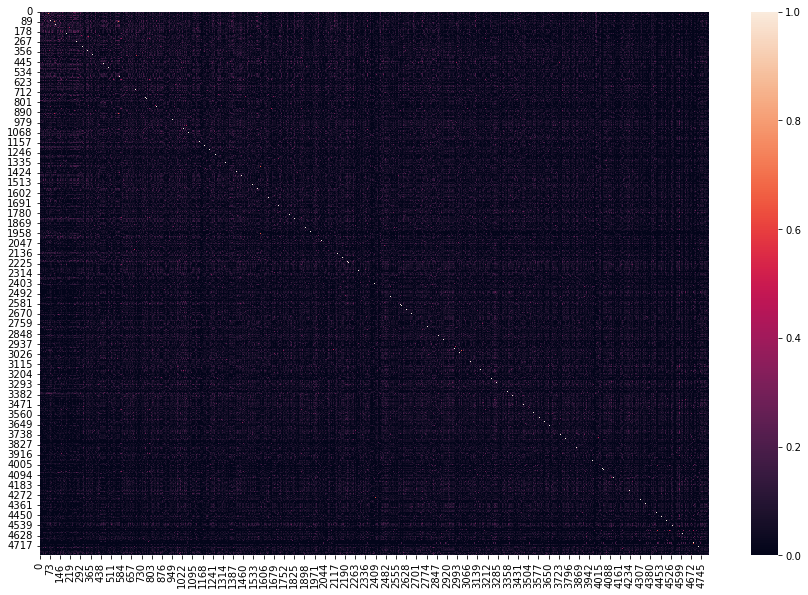

In [286]:
import seaborn as sn
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,10))

sn.heatmap(cos_sim)
#The cos_sim matrix is a numpy array with calculated cosine similarity between each movies

In [133]:
movies.shape , cos_sim.shape

((4803, 7), (4803, 4803))

### Since we are building a content based filtering system, we need to know the users’ likes in order to predict a similar item.

In [134]:
what_do_you_like = "Pirates of the Caribbean: At World's End"
movie_index = movies[movies['title']==what_do_you_like]['index'].values[0]
print(movie_index)

#Generating the Similar Movies Matrix
sim_movies = list(enumerate(cos_sim[movie_index]))
pd.DataFrame(sim_movies , columns=['i', f'movie_{movie_index}'])

1


,i,movie_1
0,0,0.105409
1,1,1.000000
2,2,0.076139
3,3,0.035806
4,4,0.073030
5,5,0.255604
6,6,0.000000
7,7,0.066667
8,8,0.116775
9,9,0.111803


### Find the similar movie of m1 "Pirates of the Caribbean: At World's End"

In [135]:
m1 = pd.DataFrame(sim_movies,columns=['i', f'movie_{1}'])
m1[m1['movie_1']>=0.5]

,i,movie_1
1,1,1.000000
12,12,0.609110
199,199,0.620752


In [136]:
sim_index_m1 = tuple(m1[m1['movie_1']>=0.5]['i'])
movies[movies['index'].isin(sim_index_m1)]

,index,title,genres,keywords,director,cast,all
1,1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Gore Verbinski,Johnny Depp Orlando Bloom Keira Knightley Stel...,ocean drug abuse exotic island east india trad...
12,12,Pirates of the Caribbean: Dead Man's Chest,Adventure Fantasy Action,witch fortune teller bondage exotic island mon...,Gore Verbinski,Johnny Depp Orlando Bloom Keira Knightley Stel...,witch fortune teller bondage exotic island mon...
199,199,Pirates of the Caribbean: The Curse of the Bla...,Adventure Fantasy Action,exotic island blacksmith east india trading co...,Gore Verbinski,Johnny Depp Geoffrey Rush Orlando Bloom Keira ...,exotic island blacksmith east india trading co...


### Find the similar movie of m2 "Avatar"

In [137]:
def get_movie_index(name):
    return movies[movies['title']==name]['index'].values[0]

def generate_sim_movies(get_movie_index):
    sim_movies = list(enumerate(cos_sim[get_movie_index]))
    return pd.DataFrame(sim_movies , columns=['i', f'movie_{get_movie_index}'])

def list_of_sim_movies_index(get_movie_index,generate_sim_movies):
    return generate_sim_movies[generate_sim_movies[f'movie_{get_movie_index}']>=0.2]
    
def list_of_sim_movies_name(get_movie_index,generate_sim_movies):
    sim_index_m1 = tuple(generate_sim_movies[generate_sim_movies[f'movie_{get_movie_index}']>=0.2]['i'])
    return movies[movies['index'].isin(sim_index_m1)]['title']

def combine_results(list_of_sim_movies_index,list_of_sim_movies_name):
    return pd.concat([list_of_sim_movies_index, list_of_sim_movies_name ], axis=1)

i = get_movie_index("X-Men")
m2 = generate_sim_movies(i)
sim_scores = list_of_sim_movies_index(i,m2)
sim_movies = list_of_sim_movies_name(i,m2)
combine_results(sim_scores,sim_movies)

,i,movie_511,title
4,4,0.230940,John Carter
7,7,0.456773,Avengers: Age of Ultron
9,9,0.314270,Batman v Superman: Dawn of Justice
10,10,0.269430,Superman Returns
14,14,0.400066,Man of Steel
16,16,0.449346,The Avengers
26,26,0.290957,Captain America: Civil War
31,31,0.307920,Iron Man 3
33,33,0.872872,X-Men: The Last Stand
38,38,0.377426,The Amazing Spider-Man 2


## Input unkown data (not exist in the dataset)

In [139]:
movies1 = movies
movies1.head()

,index,title,genres,keywords,director,cast,all
0,0,Avatar,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,James Cameron,Sam Worthington Zoe Saldana Sigourney Weaver S...,culture clash future space war space colony so...
1,1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Gore Verbinski,Johnny Depp Orlando Bloom Keira Knightley Stel...,ocean drug abuse exotic island east india trad...
2,2,Spectre,Action Adventure Crime,spy based on novel secret agent sequel mi6,Sam Mendes,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,spy based on novel secret agent sequel mi6 Act...
3,3,The Dark Knight Rises,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christopher Nolan,Christian Bale Michael Caine Gary Oldman Anne ...,dc comics crime fighter terrorist secret ident...
4,4,John Carter,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Andrew Stanton,Taylor Kitsch Lynn Collins Samantha Morton Wil...,based on novel mars medallion space travel pri...


In [140]:
#movies1['all'] = movies1['keywords']+' '+movies1['genres'] +' '+ movies1['cast'] +' '+ movies1['director']
movies1.loc[0]['all']
movies1 = movies1[['index','title','all']]
movies1.head()

,index,title,all
0,0,Avatar,culture clash future space war space colony so...
1,1,Pirates of the Caribbean: At World's End,ocean drug abuse exotic island east india trad...
2,2,Spectre,spy based on novel secret agent sequel mi6 Act...
3,3,The Dark Knight Rises,dc comics crime fighter terrorist secret ident...
4,4,John Carter,based on novel mars medallion space travel pri...


In [335]:
import warnings
warnings.filterwarnings('ignore')

In [336]:
movies1.loc[0]['all']
print(movies1.loc[16]['all'])
movies1['all'] = movies1['all'].apply(lambda x:x.lower())
print(movies1.loc[16]['all'])

new york shield marvel comic superhero based on comic book science fiction action adventure robert downey jr. chris evans mark ruffalo chris hemsworth scarlett johansson joss whedon
new york shield marvel comic superhero based on comic book science fiction action adventure robert downey jr. chris evans mark ruffalo chris hemsworth scarlett johansson joss whedon


In [320]:
def add_to_data(text):
    new_raw = [len(movies1),'unknown',text.lower()]
    movies1.loc[len(movies1)] = new_raw
    return movies1

#insert to data if not exist and return its index
def get_movie_index_2(text,movies1):
    if text.lower() in movies1['title'].values:
#         print('the text is exist in data title_col')
        return movies1[movies1['title']==text.lower()]['index'].values[0]
    if text.lower() in movies1['all'].values:
#         print('the text is exist in data all_col')
        return movies1[movies1['all']==text.lower()]['index'].values[0]
    else:
        new_df = add_to_data(text)
        global cv_matrix , cos_sim
        cv_matrix = cv.fit_transform(new_df['all'])
        cos_sim = cosine_similarity(cv_matrix)
#         print('new text added to data')
        return new_df[new_df['all']==text.lower()]['index'].values[0]

get_movie_index_2("Pirates",movies1)

4813

In [322]:
what_do_you_like = "Johnny depp"
#movie_index = movies1[movies1['title']==what_do_you_like]['index'].values[0]
movie_index = get_movie_index_2(what_do_you_like,movies1)
print(movie_index)

#Generating the Similar Movies Matrix
cv_matrix = cv.fit_transform(movies1['all'])
cos_sim = cosine_similarity(cv_matrix)
sim_movies = list(enumerate(cos_sim[movie_index]))
pd.DataFrame(sim_movies , columns=['i', f'movie_{movie_index}'])

4816


,i,movie_4816
0,0,0.000000
1,1,0.258199
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,0.000000
6,6,0.000000
7,7,0.000000
8,8,0.000000
9,9,0.000000


In [323]:
m1 = pd.DataFrame(sim_movies,columns=['i', f'movie_{movie_index}'])
m1[m1[f'movie_{movie_index}']>=0.3]

,i,movie_4816
17,17,0.301511
178,178,0.301511
1203,1203,0.324443
1394,1394,0.308607
1658,1658,0.316228
1701,1701,0.365148
1890,1890,0.301511
4816,4816,1.000000


In [304]:
sim_index_m1 = tuple(m1[m1[f'movie_{movie_index}']>=0.3]['i'])
movies1[movies1['index'].isin(sim_index_m1)]

,index,title,all
17,17,Pirates of the Caribbean: On Stranger Tides,sea captain mutiny sword prime minister Advent...
178,178,Rango,sheriff nevada pet rango chameleon Animation C...
1203,1203,Secret Window,alcohol adultery detective mississippi jealous...
1394,1394,Donnie Brasco,undercover colombia mafia mobster dirty cop Cr...
1658,1658,The Imaginarium of Doctor Parnassus,circus immortality elderly aftercreditsstinger...
1701,1701,Once Upon a Time in Mexico,corruption cia Action Antonio Banderas Salma H...
1890,1890,Don Juan DeMarco,sex addiction love mental institution patient ...
4816,4816,unknown,johnny depp


In [307]:
movies1.shape

(4817, 3)

In [326]:
movies1['title'] = movies1['title'].apply(lambda x:x.lower())

C:\Users\pc\AppData\Local\Temp\ipykernel_13104\4154754806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies1['title'] = movies1['title'].apply(lambda x:x.lower())


In [380]:
def generate_sim_movies(get_movie_index_2):
    cv_matrix = cv.fit_transform(movies1['all'])
    cos_sim = cosine_similarity(cv_matrix)
    sim_movies = list(enumerate(cos_sim[get_movie_index_2]))
    return pd.DataFrame(sim_movies , columns=['i', f'movie_{get_movie_index_2}'])

def list_of_sim_movies_index(get_movie_index_2 , generate_sim_movies):
    return generate_sim_movies[generate_sim_movies[f'movie_{get_movie_index_2}']>=0.2]
    
def list_of_sim_movies_name(get_movie_index_2 , generate_sim_movies):
    sim_index_m1 = tuple(generate_sim_movies[generate_sim_movies[f'movie_{get_movie_index_2}']>=0.2]['i'])
    return movies1[movies1['index'].isin(sim_index_m1)][['title','all']]

def combine_results(list_of_sim_movies_index , list_of_sim_movies_name , get_movie_index_2):
    return pd.concat([list_of_sim_movies_index, list_of_sim_movies_name ], axis=1).sort_values(f'movie_{get_movie_index_2}'
                                                                                              ,ascending=False)


i = get_movie_index_2("Avatar",movies1)
m2 = generate_sim_movies(i)
sim_scores = list_of_sim_movies_index(i,m2)
sim_movies = list_of_sim_movies_name(i,m2)
combine_results(sim_scores,sim_movies,i)

,i,movie_0,title,all
0,0,1.000000,avatar,culture clash future space war space colony so...
4815,4815,0.720082,unknown,culture clash future space war space colony so...
94,94,0.423390,guardians of the galaxy,marvel comic spaceship space outer space orpha...
2403,2403,0.377426,aliens,android extraterrestrial technology space mari...
3208,3208,0.346410,star wars: clone wars: volume 1,war space opera clone troopers action adventur...
47,47,0.344265,star trek into darkness,spacecraft friendship sequel futuristic space ...
56,56,0.335968,star trek beyond,sequel stranded hatred space opera action adve...
3158,3158,0.333333,alien,android countdown space marine space suit behe...
2198,2198,0.314270,lockout,usa president anti hero dementia future space ...
2696,2696,0.307920,jason x,places and planets space marine future cryogen...


In [381]:
desc = "artificial intelligence technology machine science data"

i = get_movie_index_2(desc,movies1)
m2 = generate_sim_movies(i)
sim_scores = list_of_sim_movies_index(i,m2)
sim_movies = list_of_sim_movies_name(i,m2)
combine_results(sim_scores,sim_movies,i)

,i,movie_4821,title,all
4821,4821,1.000000,unknown,artificial intelligence technology machine sci...
2966,2966,0.416667,2001: a space odyssey,moon jupiter artificial intelligence man vs ma...
2752,2752,0.356348,ex machina,dancing artificial intelligence distrust isola...
266,266,0.326599,"i, robot",suicide artificial intelligence man vs machine...
1725,1725,0.320256,blade runner,artificial intelligence man vs machine cyborg ...
634,634,0.320256,the matrix,saving the world artificial intelligence man v...
1153,1153,0.320256,lucy,artificial intelligence telepathy intelligence...
333,333,0.314270,transcendence,artificial intelligence technology nanotechnol...
93,93,0.314270,terminator 3: rise of the machines,saving the world artificial intelligence man v...
123,123,0.308607,the matrix revolutions,saving the world artificial intelligence man v...


In [373]:
movies1.shape

(4825, 3)

## content analysis (read article and recommende a similars topics)